# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [22]:
# impoet liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from tensorflow.keras import models,layers,optimizers,losses
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('car_price_data/CarPrice_Assignment.csv')

In [5]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
print(data.shape)

(205, 26)


In [7]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
data.duplicated().any()

False

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype'] = labelencoder.fit_transform(data['fueltype'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem'] = labelencoder.fit_transform(data['fuelsystem'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['doornumber'] = labelencoder.fit_transform(data['doornumber'])

In [11]:
data.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
19,20,1,chevrolet monte carlo,1,0,1,2,1,0,94.5,...,90,1,3.03,3.11,9.6,70,5400,38,43,6295.0
181,182,-1,toyouta tercel,1,0,0,4,2,0,104.5,...,161,5,3.27,3.35,9.2,156,5200,19,24,15750.0
94,95,1,nissan leaf,1,0,1,3,1,0,94.5,...,97,1,3.15,3.29,9.4,69,5200,31,37,7299.0
139,140,2,subaru dl,1,0,1,2,1,0,93.7,...,108,1,3.62,2.64,8.7,73,4400,26,31,7053.0
100,101,0,nissan nv200,1,0,0,3,1,0,97.2,...,120,1,3.33,3.47,8.5,97,5200,27,34,9549.0


In [12]:
data.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,174.049268,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,12.337289,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,166.300000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,173.200000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,183.100000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,208.100000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


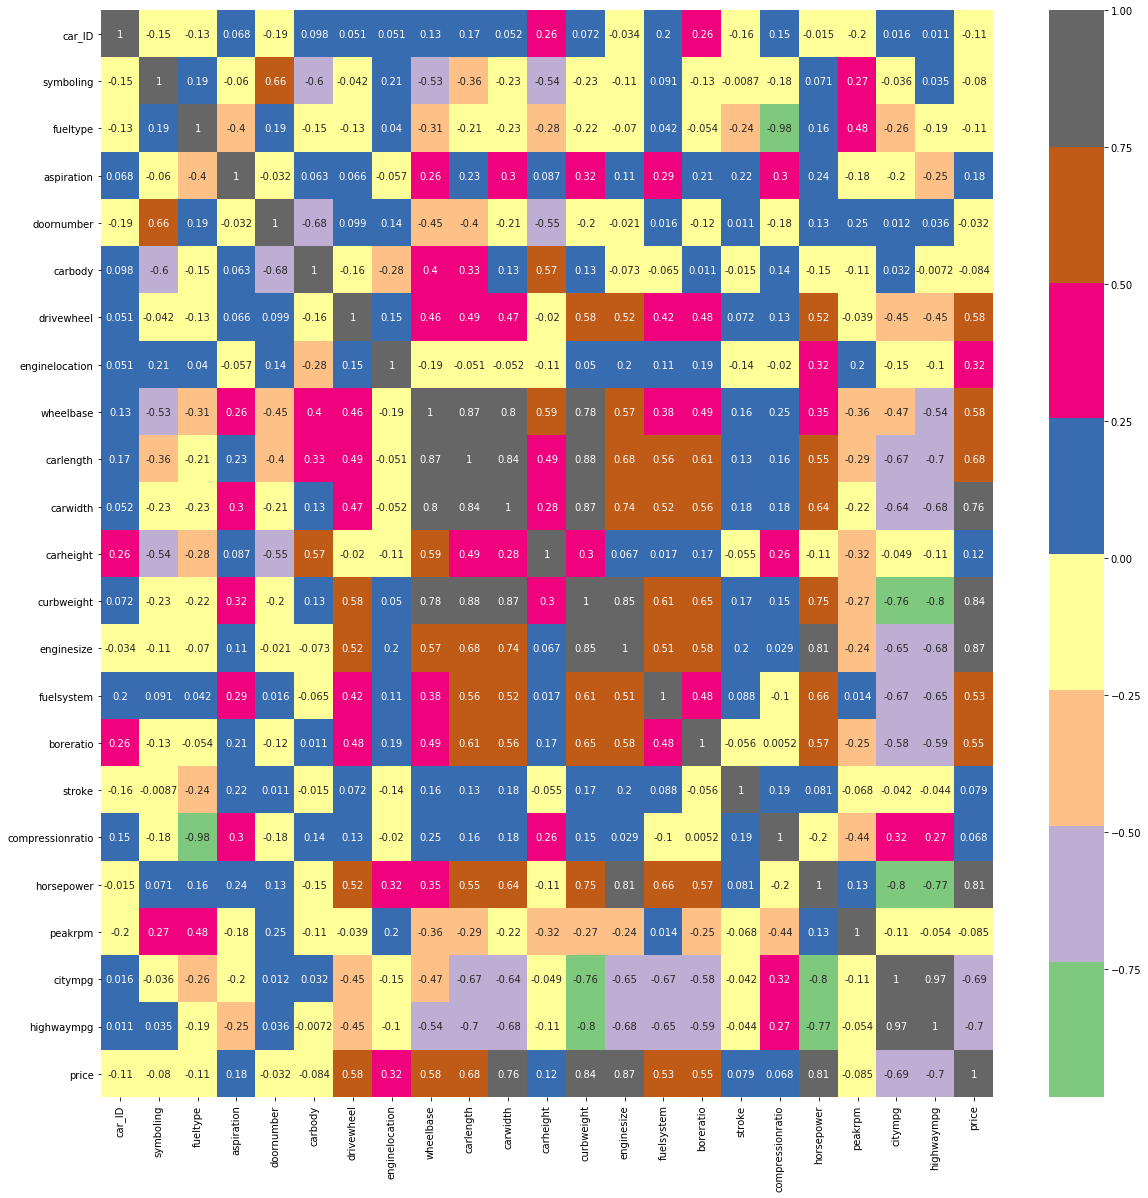

In [14]:
plt.figure(figsize=(20,20))
g=sb.heatmap(data.corr(),annot=True,cmap="Accent")

In [15]:
data = data[['enginelocation', 'wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'price']]
data

,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,price
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,111,13495.0
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,111,16500.0
2,0,94.5,171.2,65.5,52.4,2823,152,2.68,154,16500.0
3,0,99.8,176.6,66.2,54.3,2337,109,3.19,102,13950.0
4,0,99.4,176.6,66.4,54.3,2824,136,3.19,115,17450.0
...,...,...,...,...,...,...,...,...,...,...
200,0,109.1,188.8,68.9,55.5,2952,141,3.78,114,16845.0
201,0,109.1,188.8,68.8,55.5,3049,141,3.78,160,19045.0
202,0,109.1,188.8,68.9,55.5,3012,173,3.58,134,21485.0
203,0,109.1,188.8,68.9,55.5,3217,145,3.01,106,22470.0


In [16]:
data.describe()

,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.014634,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,104.117073,13276.710571
std,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,39.544167,7988.852332
min,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,48.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,70.000000,7788.000000
50%,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,95.000000,10295.000000
75%,0.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,116.000000,16503.000000
max,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,288.000000,45400.000000


In [17]:
data.drop(data.select_dtypes(include='object'),axis=1,inplace=True)

In [18]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [23]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [25]:
x_train=np.asarray(x_train).astype("float32")
x_test=np.asarray(x_test).astype("float32")

In [26]:
mean = x_train.mean(axis=0)
x_train-= mean
std = x_train.std(axis=0)
x_train/= std
x_test-= mean
x_test/= std

In [27]:
# labels 
y_mean = y_train.mean(axis=0)
y_train-= y_mean
y_std = y_train.std(axis=0)
y_train/= y_std
y_test-= y_mean
y_test/= y_std

In [28]:
# validation Data split from training Data
val_x=x_train[:50]
partial_x_train=x_train[50:]
val_y=y_train[:50]
partial_y_train=y_train[50:]

In [53]:
model = models.Sequential()
model.add(layers.Dense(10,activation="relu" ,input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6,activation="relu"))
model.add(layers.Dense(1))
model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                100       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 249
Trainable params: 249
Non-trainable params: 0
________________________________________________________

In [55]:
history = model.fit(partial_x_train, partial_y_train,epochs=100, batch_size=25, verbose=1,validation_data=(val_x,val_y))

Train on 93 samples, validate on 50 samples
Epoch 1/100
93/93 [==============================] - 0s 3ms/sample - loss: 5.0408 - mean_absolute_error: 1.2171 - val_loss: 1.3228 - val_mean_absolute_error: 0.6725
Epoch 2/100
93/93 [==============================] - 0s 149us/sample - loss: 3.0776 - mean_absolute_error: 0.9898 - val_loss: 1.2239 - val_mean_absolute_error: 0.6557
Epoch 3/100
93/93 [==============================] - 0s 172us/sample - loss: 3.6553 - mean_absolute_error: 1.0924 - val_loss: 1.1392 - val_mean_absolute_error: 0.6415
Epoch 4/100
93/93 [==============================] - 0s 172us/sample - loss: 2.5930 - mean_absolute_error: 0.9709 - val_loss: 1.0652 - val_mean_absolute_error: 0.6295
Epoch 5/100
93/93 [==============================] - 0s 86us/sample - loss: 3.0737 - mean_absolute_error: 1.0035 - val_loss: 0.9854 - val_mean_absolute_error: 0.6088
Epoch 6/100
93/93 [==============================] - 0s 172us/sample - loss: 2.6784 - mean_absolute_error: 0.9772 - val_loss

93/93 [==============================] - 0s 172us/sample - loss: 1.0151 - mean_absolute_error: 0.6434 - val_loss: 0.3393 - val_mean_absolute_error: 0.4451
Epoch 50/100
93/93 [==============================] - 0s 172us/sample - loss: 1.0372 - mean_absolute_error: 0.6755 - val_loss: 0.3396 - val_mean_absolute_error: 0.4469
Epoch 51/100
93/93 [==============================] - 0s 172us/sample - loss: 1.0310 - mean_absolute_error: 0.6365 - val_loss: 0.3402 - val_mean_absolute_error: 0.4493
Epoch 52/100
93/93 [==============================] - 0s 172us/sample - loss: 1.0426 - mean_absolute_error: 0.6366 - val_loss: 0.3419 - val_mean_absolute_error: 0.4527
Epoch 53/100
93/93 [==============================] - 0s 172us/sample - loss: 1.0708 - mean_absolute_error: 0.6405 - val_loss: 0.3391 - val_mean_absolute_error: 0.4502
Epoch 54/100
93/93 [==============================] - 0s 172us/sample - loss: 1.1481 - mean_absolute_error: 0.6746 - val_loss: 0.3384 - val_mean_absolute_error: 0.4500
Epoch

93/93 [==============================] - 0s 172us/sample - loss: 0.8189 - mean_absolute_error: 0.5583 - val_loss: 0.2320 - val_mean_absolute_error: 0.3568
Epoch 98/100
93/93 [==============================] - 0s 172us/sample - loss: 0.7521 - mean_absolute_error: 0.5632 - val_loss: 0.2269 - val_mean_absolute_error: 0.3518
Epoch 99/100
93/93 [==============================] - 0s 86us/sample - loss: 0.8438 - mean_absolute_error: 0.6033 - val_loss: 0.2357 - val_mean_absolute_error: 0.3683
Epoch 100/100
93/93 [==============================] - 0s 172us/sample - loss: 0.8464 - mean_absolute_error: 0.5990 - val_loss: 0.2298 - val_mean_absolute_error: 0.3619


In [44]:
model.evaluate(x_test, y_test)

62/62 [==============================] - 0s 0s/sample - loss: 0.3073 - mean_absolute_error: 0.3668


[0.3073210552815468, 0.36678928]

In [46]:
prediction = model.predict(x_test)
prediction[1]

array([-0.5584887], dtype=float32)

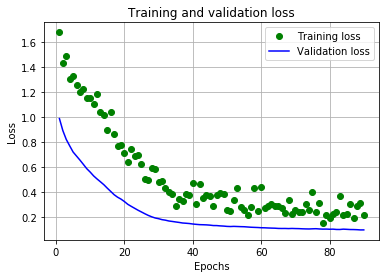

In [50]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss,"go",label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

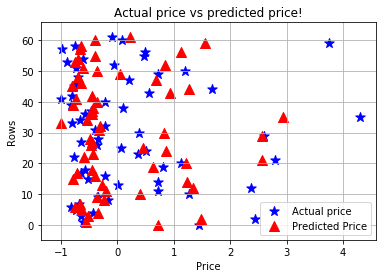

In [52]:
y=prediction
y1=range(62)
x=y_test
plt.scatter(x, y1, label= "Actual price", color= "b", marker= "*", s=100)
plt.scatter(y, y1, label= "Predicted Price", color= "red", marker= "^", s=100)
plt.xlabel('Price')
plt.ylabel('Rows')
plt.title('Actual price vs predicted price!')
plt.legend()
plt.grid()
plt.show()